In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/flipkart.csv')
df

,name,s_price,o_price,rating,rating_count
0,Adsun Smart Series 60 cm (24 inch) HD Ready LE...,"₹6,649","₹18,999",3.8,"13,066 Ratings & 1,860 Reviews"
1,Adsun Frameless 80 cm (32 inch) HD Ready LED S...,"₹8,549","₹29,999",3.8,"13,066 Ratings & 1,860 Reviews"
2,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,"₹13,490","₹18,900",4.3,"70,154 Ratings & 6,232 Reviews"
3,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹13,999","₹24,999",4.4,"3,23,612 Ratings & 30,752 Reviews"
4,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,"₹8,999","₹16,999",4.2,"8,481 Ratings & 1,271 Reviews"
...,...,...,...,...,...
1059,Dyanora 108 cm (43 inch) Full HD LED Smart And...,"₹15,999","₹32,999",4.1,"3,682 Ratings & 476 Reviews"
1060,LG 108 cm (43 inch) Ultra HD (4K) LED Smart We...,"₹47,192","₹58,990",4.5,327 Ratings & 52 Reviews
1061,SAMSUNG QN90BAK 216 cm (85 inch) QLED Ultra HD...,"₹6,09,990","₹8,79,900",NaN,NaN
1062,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          984 non-null    object 
 1   s_price       984 non-null    object 
 2   o_price       960 non-null    object 
 3   rating        757 non-null    float64
 4   rating_count  757 non-null    object 
dtypes: float64(1), object(4)
memory usage: 41.7+ KB


In [7]:
df.dropna(how='all') # if any row has all null values,then drop it

,name,s_price,o_price,rating,rating_count
0,Adsun Smart Series 60 cm (24 inch) HD Ready LE...,"₹6,649","₹18,999",3.8,"13,066 Ratings & 1,860 Reviews"
1,Adsun Frameless 80 cm (32 inch) HD Ready LED S...,"₹8,549","₹29,999",3.8,"13,066 Ratings & 1,860 Reviews"
2,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,"₹13,490","₹18,900",4.3,"70,154 Ratings & 6,232 Reviews"
3,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹13,999","₹24,999",4.4,"3,23,612 Ratings & 30,752 Reviews"
4,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,"₹8,999","₹16,999",4.2,"8,481 Ratings & 1,271 Reviews"
...,...,...,...,...,...
1057,LG 165.1 cm (65 inch) Ultra HD (4K) LED Smart ...,"₹83,859","₹1,49,990",NaN,NaN
1058,Dyanora 80 cm (32 inch) HD Ready LED Smart And...,"₹8,699","₹18,999",4.1,"3,682 Ratings & 476 Reviews"
1059,Dyanora 108 cm (43 inch) Full HD LED Smart And...,"₹15,999","₹32,999",4.1,"3,682 Ratings & 476 Reviews"
1060,LG 108 cm (43 inch) Ultra HD (4K) LED Smart We...,"₹47,192","₹58,990",4.5,327 Ratings & 52 Reviews


In [18]:
df['s_price']= df['s_price'].apply(lambda p: str(p).replace('₹','').replace(',','')).astype(float)
df['o_price']= df['o_price'].apply(lambda p: str(p).replace('₹','').replace(',','')).astype(float)

In [20]:
pd.set_option('display.max_colwidth',None) # optional setting to display full text in a column

In [32]:
def clean_rating_count(value):
    if isinstance(value, float):
        return value
    value_parts = value.split()
    num_rating = value_parts[0].replace(',','')
    num_reviews = value_parts[3].replace(',','')
    return num_reviews , num_rating

df['rating_count'].apply(clean_rating_count) # test run

0         (1860, 13066)
1         (1860, 13066)
2         (6232, 70154)
3       (30752, 323612)
4          (1271, 8481)
             ...       
1059        (476, 3682)
1060          (52, 327)
1061                NaN
1062                NaN
1063                NaN
Name: rating_count, Length: 1064, dtype: object

In [35]:
df['rating_count'].apply(clean_rating_count).apply(pd.Series) # test run for columns

,0,1
0,1860,13066
1,1860,13066
2,6232,70154
3,30752,323612
4,1271,8481
...,...,...
1059,476,3682
1060,52,327
1061,NaN,NaN
1062,NaN,NaN


In [34]:
df[['num_rating','num_reviews']] = df['rating_count'].apply(clean_rating_count).apply(pd.Series)

In [38]:
df.drop(columns=['rating_count'], inplace=True)

In [39]:
df.head()

,name,s_price,o_price,rating,num_rating,num_reviews
0,Adsun Smart Series 60 cm (24 inch) HD Ready LED Smart Android Based TV,6649.0,18999.0,3.8,1860,13066
1,Adsun Frameless 80 cm (32 inch) HD Ready LED Smart Android Based TV,8549.0,29999.0,3.8,1860,13066
2,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tizen TV with 2022 Model,13490.0,18900.0,4.3,6232,70154
3,Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model),13999.0,24999.0,4.4,30752,323612
4,Infinix Y1 80 cm (32 inch) HD Ready LED Smart Linux TV,8999.0,16999.0,4.2,1271,8481


In [40]:
df['s_price'].max()

609990.0

In [42]:
idx = df['s_price'].argmax() # index number of max value
df.loc[idx]

name           SAMSUNG QN90BAK 216 cm (85 inch) QLED Ultra HD (4K) Smart Tizen TV
s_price                                                                  609990.0
o_price                                                                  879900.0
rating                                                                        NaN
num_rating                                                                    NaN
num_reviews                                                                   NaN
Name: 1061, dtype: object

<AxesSubplot: ylabel='Frequency'>

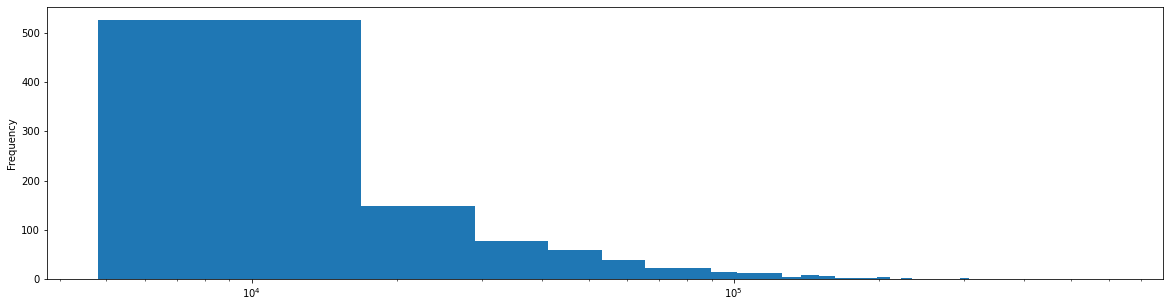

In [46]:
df['s_price'].plot(kind='hist', bins=50, figsize=(20,5))

<AxesSubplot: >

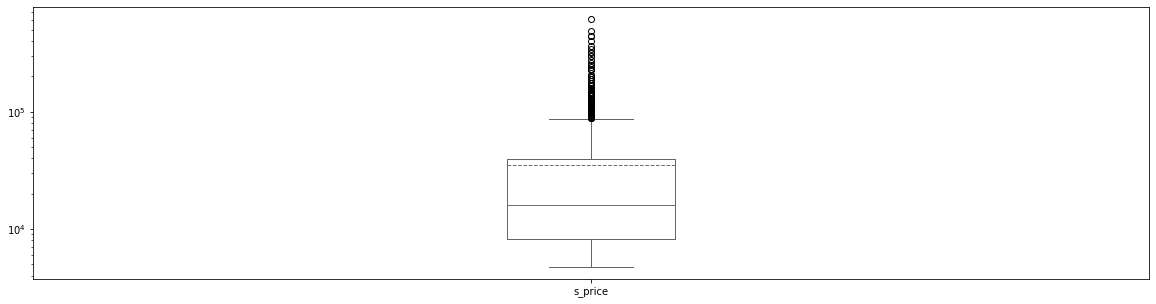

In [51]:
df['s_price'].plot(kind='box', figsize=(20,5), meanline=True, showmeans=True, logy=True)

In [67]:
def get_size_of_tv(value):
    if isinstance(value, float):
        return value
    if 'inch' in value.lower():
        si = value.find('(')+1
        ei = value.find(')')
        return value[si:ei].split()[0]
    return value

df['name'].apply(get_size_of_tv)

0        24
1        32
2        32
3        32
4        32
       ... 
1059     43
1060     43
1061     85
1062    NaN
1063    NaN
Name: name, Length: 1064, dtype: object

In [61]:
df['size'] = df['name'].apply(get_size_of_tv)
df.head()

,name,s_price,o_price,rating,num_rating,num_reviews,size
0,Adsun Smart Series 60 cm (24 inch) HD Ready LED Smart Android Based TV,6649.0,18999.0,3.8,1860,13066,24
1,Adsun Frameless 80 cm (32 inch) HD Ready LED Smart Android Based TV,8549.0,29999.0,3.8,1860,13066,32
2,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tizen TV with 2022 Model,13490.0,18900.0,4.3,6232,70154,32
3,Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model),13999.0,24999.0,4.4,30752,323612,32
4,Infinix Y1 80 cm (32 inch) HD Ready LED Smart Linux TV,8999.0,16999.0,4.2,1271,8481,32
